Playground for quickdraw data

In [3]:
import numpy as np
import matplotlib.pyplot as plt

from matplotlib import animation, rc
print(animation.writers.list())
from IPython.display import HTML

from data_util import *

%matplotlib inline

data_file = 'data/lobster.bin'

count = 0
drawings = []
for drawing in unpack_drawings(data_file):
    # do something with the drawing
    drawings.append(drawing)
    count = count + 1
    if count > 4:
        break
        
print(len(drawings))

['imagemagick', 'imagemagick_file']
5


KeyError: 'ffmpeg'

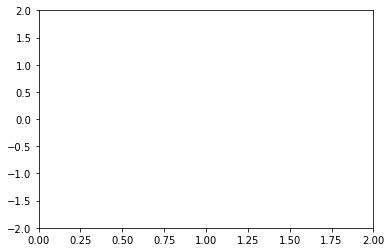

In [2]:
image = drawings[0]['image'] # ((x,y), (x,y), ... for all strokes)
n_strokes = len(image)

# for i in range(n_strokes):
#     print(image[i][0])
#     plt.plot(image[i][0],image[i][1], '.r-') 
#     plt.axis('off')# plt.gcf().set_size_inches(2, 2)
#     plt.show()

fig, ax = plt.subplots()
ax.set_xlim(( 0, 2))
ax.set_ylim((-2, 2))
line, = ax.plot([], [], lw=2)

# initialization function: plot the background of each frame
def init():
    line.set_data([], [])
    return (line,)
# animation function. This is called sequentially
def animate(i):
    x = np.linspace(0, 2, 1000)
    y = np.sin(2 * np.pi * (x - 0.01 * i))
    line.set_data(x, y)
    return (line,)

# call the animator. blit=True means only re-draw the parts that have changed.
anim = animation.FuncAnimation(fig, animate, init_func=init,
                               frames=100, interval=20, blit=True)

HTML(anim.to_html5_video())